In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
import tensorflow as tf

from IPython.display import clear_output
from time import sleep
from livelossplot.tf_keras import PlotLossesCallback
from tensorflow import keras as keras

from keras.layers import Conv2D,Dropout,Dense,Flatten
from keras.models import Sequential

from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D, MaxPool2D, ZeroPadding2D
from keras.optimizers import Adam, SGD
from keras.callbacks import TensorBoard

%matplotlib inline
%load_ext tensorboard

print("tensorflow version : ${}".format(tf.__version__))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
tensorflow version : $1.15.0


In [82]:
# Use GPU if anabled
# 
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17632917229342891184
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 6558740472366568227
physical_device_desc: "device: XLA_CPU device"
]


[]

In [83]:
input_training = pd.read_csv('./training.csv')  
input_test = pd.read_csv('./test.csv')
inpup_lookup = pd.read_csv('./IdLookupTable.csv')

IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

ROWS_COUNT_TRAINING = 7049
ROWS_COUNT_TEST = 1783

In [84]:
# Fill missing data in training data
# 

# train_data.head().T
input_training.isnull().any().value_counts()
input_training.fillna(method = 'ffill',inplace = True)
#train_data.reset_index(drop = True,inplace = True)
input_training.isnull().any().value_counts()


False    31
dtype: int64

In [85]:
# training data X
#
imag = []
for i in range(0, ROWS_COUNT_TRAINING):
    img = input_training['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    imag.append(img)
    
image_list = np.array(imag, dtype = 'float')
X_train = image_list.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1)

In [86]:
# training data Y
#
training = input_training.drop('Image', axis = 1)

y_train = []
for i in range(0, ROWS_COUNT_TRAINING):
    y = training.iloc[i,:]
    y_train.append(y)
    
y_train = np.array(y_train,dtype = 'float')

In [87]:
# test data X
# 
timag = []
for i in range(0, ROWS_COUNT_TEST):
    timg = input_test['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    timag.append(timg)
    
timage_list = np.array(timag,dtype = 'float')
X_test = timage_list.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, 1) 

In [88]:
# test data Y
#
test = input_test.drop('Image', axis = 1)

y_test = []
for i in range(0, ROWS_COUNT_TEST):
    y = test.iloc[i,:]
    y_test.append(y)
    
y_test = np.array(y_test,dtype = 'float')

In [89]:
def show_images(input_data, input_data_count):
    columns = 5
    rows = 5
    fig = plt.figure(figsize=(12, 12))
    for i in range(1, columns * rows + 1):
        fig.add_subplot(rows, columns, i)
        plt.imshow(input_data[np.random.randint(0, input_data_count)]
                   .reshape(IMAGE_WIDTH, IMAGE_HEIGHT), cmap='gray')
    plt.show()

In [90]:
def show_training_images():
    show_images(X_train, ROWS_COUNT_TRAINING)

In [91]:
def show_test_images():
    show_images(X_test, ROWS_COUNT_TEST)

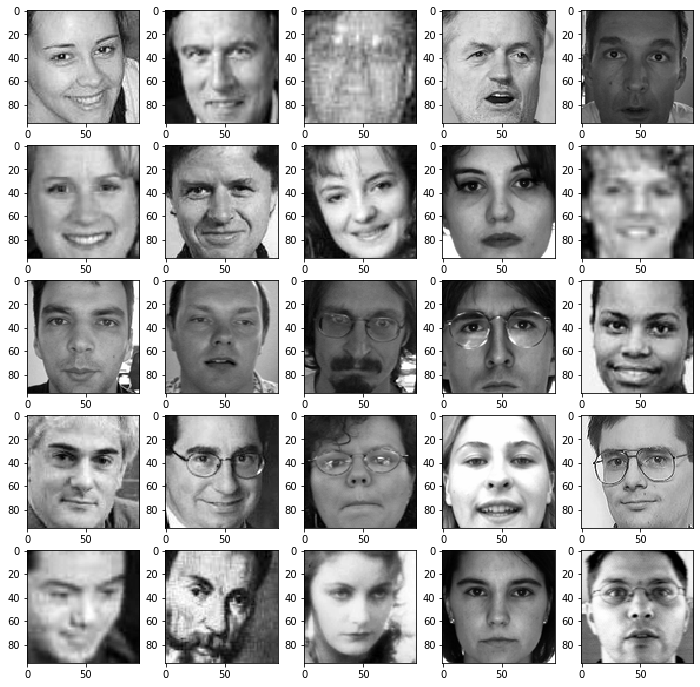

In [92]:
show_training_images()

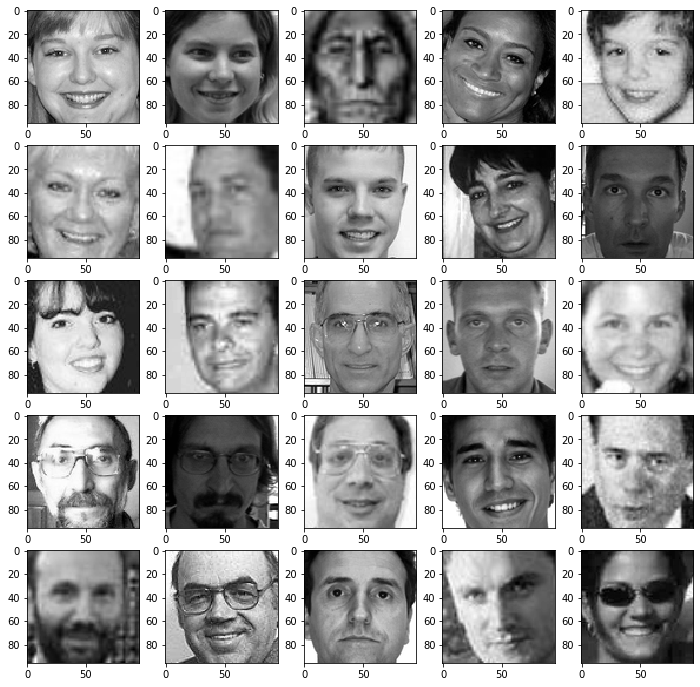

In [93]:
show_test_images()

In [94]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=32, activation="relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1)))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

model.summary()

# model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# # model.add(BatchNormalization())
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())

# model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
# model.add(LeakyReLU(alpha = 0.1))
# model.add(BatchNormalization())


# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(30))

# model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 65, 65, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               16777728  
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)               

In [95]:
model.compile(optimizer=Adam(lr=0.001), 
              loss='mean_squared_error',
              metrics=['mae'])
# loss='sparse_categorical_crossentropy',

In [97]:
now = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join("logs_miw", now)
tensorboard = TensorBoard(
    log_dir = logdir, 
    write_graph = True,
    write_grads = True,
    histogram_freq = 1,
    write_images = True
)
callbacks = [tensorboard]

In [100]:
hist = model.fit(
    X_train, 
    y_train, 
    epochs = 10, 
    batch_size = 256, 
    validation_split = 0.2, 
#     validation_data=(X_test, y_test),
    callbacks = callbacks, 
    verbose = 1
)


Train on 5639 samples, validate on 1410 samples




Epoch 1/10
5639/5639 [==============================] - 24s 4ms/step - loss: 91770.9172 - mae: 97.0925 - val_loss: 2710.6150 - val_mae: 48.5390

Epoch 2/10
5639/5639 [==============================] - 28s 5ms/step - loss: 2667.4083 - mae: 48.1100 - val_loss: 2708.8588 - val_mae: 48.5219
Epoch 3/10
5639/5639 [==============================] - 24s 4ms/step - loss: 2665.5090 - mae: 48.0912 - val_loss: 2706.7350 - val_mae: 48.5012
Epoch 4/10
5639/5639 [==============================] - 24s 4ms/step - loss: 2663.2147 - mae: 48.0686 - val_loss: 2704.1944 - val_mae: 48.4763
Epoch 5/10
5639/5639 [==============================] - 24s 4ms/step - loss: 2660.4845 - mae: 48.0416 - val_loss: 2701.1781 - val_mae: 48.4466
Epoch 6/10
5639/5639 [==============================] - 25s 5ms/step - loss: 2657.2736 - mae: 48.0096 - val_loss: 2697.6708 - val_mae: 48.4119
Epoch 7/10
5639/5639 [==============================] - 24s 4ms/step - loss: 2653.5601 

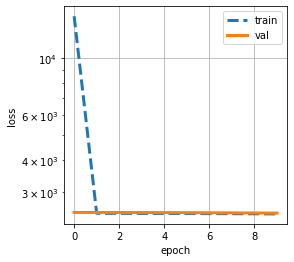

In [107]:
def show_loss_graph(history):
    plt.figure(figsize=(4,4))
    loss = history['loss']
    val_loss = history['val_loss']
    loss = np.sqrt(np.array(loss))*48 
    val_loss = np.sqrt(np.array(val_loss))*48 
    plt.plot(loss, "--", linewidth=3, label="train")
    plt.plot(val_loss, linewidth=3, label="val")
    plt.legend()
    plt.grid()
    plt.yscale("log")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()

show_loss_graph(hist.history)

In [ ]:
pred = model.predict(X_test)

ValueError: x and y must be the same size

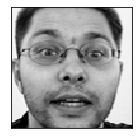

In [76]:
def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='x', s=10)


fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()

In [ ]:
lookid_list = list(inpup_lookup['FeatureName'])
imageID = list(inpup_lookup['ImageId']-1)
pre_list = list(pred)

In [ ]:
rowid = inpup_lookup['RowId']
rowid = list(rowid)


In [ ]:
feature = []
for f in list(inpup_lookup['FeatureName']):
    feature.append(lookid_list.index(f))

In [ ]:
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])

In [ ]:
rowid = pd.Series(rowid,name = 'RowId')

In [ ]:
loc = pd.Series(preded,name = 'Location')

In [ ]:
submission = pd.concat([rowid,loc],axis = 1)

In [ ]:
print(submission)

In [ ]:
submission.to_csv('face_key_detection_submission.csv',index = False)